In [1]:
import pandas as pd
import numpy as np

In [33]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from datetime import timedelta
sns.set()
tf.compat.v1.random.set_random_seed(1234)

In [8]:
df_pos_nega = pd.read_excel("article_pos_nega_scores.xlsx")

In [9]:
df_pos_nega.head()

,date,positive,negative,pol_score
0,2019.10.15,0.98480,0.01520,0.96950
1,2019.10.16,0.99355,0.00645,0.98715
2,2019.10.17,0.99305,0.00695,0.98615
3,2019.10.18,0.99530,0.00470,0.99070
4,2019.10.19,0.76700,0.23300,0.53390


In [10]:
df_pos_nega.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 4 columns):
date         145 non-null object
positive     145 non-null float64
negative     145 non-null float64
pol_score    145 non-null float64
dtypes: float64(3), object(1)
memory usage: 4.7+ KB


In [11]:
df_pos_nega['date_1'] = pd.to_datetime(df_pos_nega['date'])

In [12]:
df_pos_nega.head()

,date,positive,negative,pol_score,date_1
0,2019.10.15,0.98480,0.01520,0.96950,2019-10-15
1,2019.10.16,0.99355,0.00645,0.98715,2019-10-16
2,2019.10.17,0.99305,0.00695,0.98615,2019-10-17
3,2019.10.18,0.99530,0.00470,0.99070,2019-10-18
4,2019.10.19,0.76700,0.23300,0.53390,2019-10-19


In [13]:
df_stock = pd.read_csv("005930.KS.csv") # download @ yahoo finance

In [14]:
df_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-03-09,28800.0,28800.0,28400.0,28400.0,275.414124,7814600.0
1,2015-03-10,28680.0,28860.0,28400.0,28420.0,275.608093,10419850.0
2,2015-03-11,28380.0,29580.0,28360.0,29480.0,285.887604,21108650.0
3,2015-03-12,29200.0,29460.0,28940.0,28940.0,280.650879,19153200.0
4,2015-03-13,29220.0,29580.0,29100.0,29140.0,282.590424,9413100.0


In [15]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228 entries, 0 to 1227
Data columns (total 7 columns):
Date         1228 non-null object
Open         1223 non-null float64
High         1223 non-null float64
Low          1223 non-null float64
Close        1223 non-null float64
Adj Close    1223 non-null float64
Volume       1223 non-null float64
dtypes: float64(6), object(1)
memory usage: 67.3+ KB


In [17]:
df_stock["date_1"] = pd.to_datetime(df_stock['Date'])

In [20]:
df_merge = pd.merge(df_pos_nega, df_stock, on = 'date_1', how='left', sort=False)

In [22]:
df_merge.head()

,date,positive,negative,pol_score,date_1,Date,Open,High,Low,Close,Adj Close,Volume
0,2019.10.15,0.98480,0.01520,0.96950,2019-10-15,2019-10-15,49900.0,50200.0,49900.0,50100.0,50100.0,6058105.0
1,2019.10.16,0.99355,0.00645,0.98715,2019-10-16,2019-10-16,50700.0,50900.0,50400.0,50700.0,50700.0,9136282.0
2,2019.10.17,0.99305,0.00695,0.98615,2019-10-17,2019-10-17,50500.0,50600.0,50100.0,50500.0,50500.0,6701380.0
3,2019.10.18,0.99530,0.00470,0.99070,2019-10-18,2019-10-18,50300.0,50900.0,49650.0,49900.0,49900.0,8483106.0
4,2019.10.19,0.76700,0.23300,0.53390,2019-10-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df_merge = df_merge[["date_1","Adj Close", "positive","negative"]]

In [25]:
df_merge.head()

,date_1,Adj Close,positive,negative
0,2019-10-15,50100.0,0.98480,0.01520
1,2019-10-16,50700.0,0.99355,0.00645
2,2019-10-17,50500.0,0.99305,0.00695
3,2019-10-18,49900.0,0.99530,0.00470
4,2019-10-19,NaN,0.76700,0.23300


In [26]:
df_merge.isnull().sum()

date_1        0
Adj Close    47
positive      0
negative      0
dtype: int64

In [28]:
df_final = df_merge.dropna()

In [29]:
df_final.isnull().sum()

date_1       0
Adj Close    0
positive     0
negative     0
dtype: int64

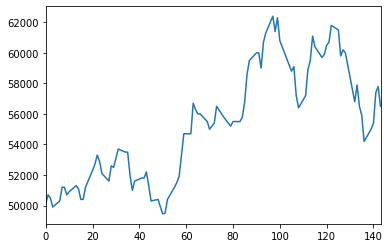

In [31]:
df_final['Adj Close'].plot()

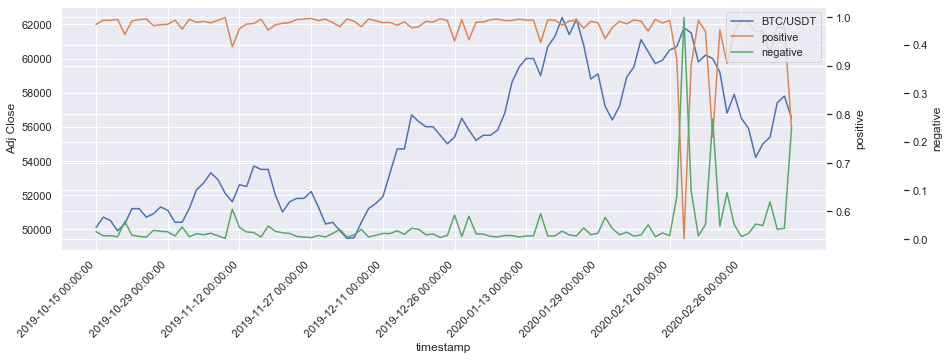

In [36]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

close = df_final['Adj Close'].tolist()
positive = df_final['positive'].tolist()
negative = df_final['negative'].tolist()
timestamp = df_final['date_1'].tolist()

plt.figure(figsize = (17, 5))
host = host_subplot(111)
plt.subplots_adjust(right = 0.75, top = 0.8)
par1 = host.twinx()
par2 = host.twinx()

par2.spines['right'].set_position(('axes', 1.1))
par2.spines['bottom'].set_position(('axes', 0.9))
host.set_xlabel('timestamp')
host.set_ylabel('Adj Close')
par1.set_ylabel('positive')
par2.set_ylabel('negative')

host.plot(close, label = 'BTC/USDT')
par1.plot(positive, label = 'positive')
par2.plot(negative, label = 'negative')
host.legend()
plt.xticks(
        np.arange(len(timestamp))[::10], timestamp[::10], rotation = '45', ha = 'right'
    )
plt.legend()
plt.show()

In [69]:
df_final.reset_index(inplace = True)

In [72]:
df_final.drop(['index'], axis = 1, inplace = True)

C:\Users\kt347\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [73]:
minmax = MinMaxScaler().fit(df_final.iloc[:, 1:2].astype('float32'))
df_log = minmax.transform(df_final.iloc[:, 1:2].astype('float32'))
df_log = pd.DataFrame(df_log)
df_log[1] = df_final['positive']
df_log[2] = df_final['negative']
df_log.head()

,0,1,2
0,0.050193,0.98480,0.01520
1,0.096525,0.99355,0.00645
2,0.081081,0.99305,0.00695
3,0.034749,0.99530,0.00470
4,0.065637,0.96405,0.03595


In [74]:
num_layers = 1
size_layer = 128
epoch = 200
dropout_rate = 0.75
test_size = 3 * 10 # timestamp every 20 minutes, and I want to test on last 12 hours
learning_rate = 1e-3
timestamp = test_size

df_train = df_log.iloc[:-test_size]
df_test = df_log.iloc[-test_size:]
df.shape, df_train.shape, df_test.shape

((98, 1), (68, 3), (30, 3))

In [75]:
def encoder_block(inp, n_hidden, filter_size):
    inp = tf.expand_dims(inp, 2)
    inp = tf.pad(
        inp,
        [
            [0, 0],
            [(filter_size[0] - 1) // 2, (filter_size[0] - 1) // 2],
            [0, 0],
            [0, 0],
        ],
    )
    conv = tf.layers.conv2d(
        inp, n_hidden, filter_size, padding = 'VALID', activation = None
    )
    conv = tf.squeeze(conv, 2)
    return conv


def decoder_block(inp, n_hidden, filter_size):
    inp = tf.expand_dims(inp, 2)
    inp = tf.pad(inp, [[0, 0], [filter_size[0] - 1, 0], [0, 0], [0, 0]])
    conv = tf.layers.conv2d(
        inp, n_hidden, filter_size, padding = 'VALID', activation = None
    )
    conv = tf.squeeze(conv, 2)
    return conv


def glu(x):
    return tf.multiply(
        x[:, :, : tf.shape(x)[2] // 2],
        tf.sigmoid(x[:, :, tf.shape(x)[2] // 2 :]),
    )


def layer(inp, conv_block, kernel_width, n_hidden, residual = None):
    z = conv_block(inp, n_hidden, (kernel_width, 1))
    return glu(z) + (residual if residual is not None else 0)

class Model:
    def __init__(
        self,
        learning_rate,
        num_layers,
        size,
        size_layer,
        output_size,
        kernel_size = 3,
        n_attn_heads = 16,
        dropout = 0.9,
    ):
        self.X = tf.placeholder(tf.float32, (None, None, size))
        self.Y = tf.placeholder(tf.float32, (None, output_size))

        encoder_embedded = tf.layers.dense(self.X, size_layer)

        e = tf.identity(encoder_embedded)
        for i in range(num_layers):
            z = layer(
                encoder_embedded,
                encoder_block,
                kernel_size,
                size_layer * 2,
                encoder_embedded,
            )
            z = tf.nn.dropout(z, keep_prob = dropout)
            encoder_embedded = z

        encoder_output, output_memory = z, z + e
        g = tf.identity(encoder_embedded)

        for i in range(num_layers):
            attn_res = h = layer(
                encoder_embedded,
                decoder_block,
                kernel_size,
                size_layer * 2,
                residual = tf.zeros_like(encoder_embedded),
            )
            C = []
            for j in range(n_attn_heads):
                h_ = tf.layers.dense(h, size_layer // n_attn_heads)
                g_ = tf.layers.dense(g, size_layer // n_attn_heads)
                zu_ = tf.layers.dense(
                    encoder_output, size_layer // n_attn_heads
                )
                ze_ = tf.layers.dense(output_memory, size_layer // n_attn_heads)

                d = tf.layers.dense(h_, size_layer // n_attn_heads) + g_
                dz = tf.matmul(d, tf.transpose(zu_, [0, 2, 1]))
                a = tf.nn.softmax(dz)
                c_ = tf.matmul(a, ze_)
                C.append(c_)

            c = tf.concat(C, 2)
            h = tf.layers.dense(attn_res + c, size_layer)
            h = tf.nn.dropout(h, keep_prob = dropout)
            encoder_embedded = h

        encoder_embedded = tf.sigmoid(encoder_embedded[-1])
        self.logits = tf.layers.dense(encoder_embedded, output_size)
        self.cost = tf.reduce_mean(tf.square(self.Y - self.logits))
        self.optimizer = tf.train.AdamOptimizer(learning_rate).minimize(
            self.cost
        )
        
def calculate_accuracy(real, predict):
    real = np.array(real) + 1
    predict = np.array(predict) + 1
    percentage = 1 - np.sqrt(np.mean(np.square((real - predict) / real)))
    return percentage * 100

def anchor(signal, weight):
    buffer = []
    last = signal[0]
    for i in signal:
        smoothed_val = last * weight + (1 - weight) * i
        buffer.append(smoothed_val)
        last = smoothed_val
    return buffer

In [76]:
tf.reset_default_graph()
modelnn = Model(
    learning_rate, num_layers, df_log.shape[1], size_layer, df_log.shape[1], 
    dropout = dropout_rate
)
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

C:\Users\kt347\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [77]:
from tqdm import tqdm

pbar = tqdm(range(epoch), desc = 'train loop')
for i in pbar:
    init_value = np.zeros((1, num_layers * 2 * size_layer))
    total_loss, total_acc = [], []
    for k in range(0, df_train.shape[0] - 1, timestamp):
        index = min(k + timestamp, df_train.shape[0] - 1)
        batch_x = np.expand_dims(
            df_train.iloc[k : index, :].values, axis = 0
        )
        batch_y = df_train.iloc[k + 1 : index + 1, :].values
        logits, _, loss = sess.run(
            [modelnn.logits, modelnn.optimizer, modelnn.cost],
            feed_dict = {modelnn.X: batch_x, modelnn.Y: batch_y},
        )        
        total_loss.append(loss)
        total_acc.append(calculate_accuracy(batch_y[:, 0], logits[:, 0]))
    pbar.set_postfix(cost = np.mean(total_loss), acc = np.mean(total_acc))

train loop: 100%|████████████████████████████████████████████| 200/200 [00:08<00:00, 24.34it/s, acc=96.5, cost=0.00106]


In [78]:
future_day = test_size

output_predict = np.zeros((df_train.shape[0] + future_day, df_train.shape[1]))
output_predict[0] = df_train.iloc[0]
upper_b = (df_train.shape[0] // timestamp) * timestamp

for k in range(0, (df_train.shape[0] // timestamp) * timestamp, timestamp):
    out_logits = sess.run(
        modelnn.logits,
        feed_dict = {
            modelnn.X: np.expand_dims(
                df_train.iloc[k : k + timestamp], axis = 0
            )
        },
    )
    output_predict[k + 1 : k + timestamp + 1] = out_logits

if upper_b != df_train.shape[0]:
    out_logits = sess.run(
        modelnn.logits,
        feed_dict = {
            modelnn.X: np.expand_dims(df_train.iloc[upper_b:], axis = 0)
        },
    )
    output_predict[upper_b + 1 : df_train.shape[0] + 1] = out_logits
    future_day -= 1

In [79]:
output_predict_negative = output_predict.copy()
output_predict_positive = output_predict.copy()

In [80]:
for i in range(future_day):
    o = output_predict[-future_day - timestamp + i:-future_day + i].copy()
    o = np.expand_dims(o, axis = 0)
    
    o_negative = output_predict_negative[-future_day - timestamp + i:-future_day + i].copy()
    o_negative = np.expand_dims(o_negative, axis = 0)
    o_negative[:, :, 1] = 0.0
    o_negative[:, :, 2] = 1.0
    
    o_positive = output_predict_positive[-future_day - timestamp + i:-future_day + i].copy()
    o_positive = np.expand_dims(o_positive, axis = 0)
    o_positive[:, :, 1] = 1.0
    o_positive[:, :, 2] = 0.0
    
    # original without any consensus
    out_logits = sess.run(
        modelnn.logits,
        feed_dict = {
            modelnn.X: o
        },
    )
    output_predict[-future_day + i] = out_logits[-1]
    
    # negative consensus
    out_logits = sess.run(
        modelnn.logits,
        feed_dict = {
            modelnn.X: o_negative
        },
    )
    output_predict_negative[-future_day + i] = out_logits[-1]
    
    # positive consensus
    out_logits = sess.run(
        modelnn.logits,
        feed_dict = {
            modelnn.X: o_positive
        },
    )
    output_predict_positive[-future_day + i] = out_logits[-1]

In [81]:
output_predict_original = minmax.inverse_transform(output_predict[:,:1])
output_predict_negative = minmax.inverse_transform(output_predict_negative[:,:1])
output_predict_positive = minmax.inverse_transform(output_predict_positive[:,:1])

In [82]:
deep_future = anchor(output_predict_original[:, 0], 0.7)
deep_future_negative = anchor(output_predict_negative[:, 0], 0.7)
deep_future_positive = anchor(output_predict_positive[:, 0], 0.7)

In [83]:
df.shape, len(deep_future_negative)

((98, 1), 98)

In [84]:
df_train = minmax.inverse_transform(df_train)
df_test = minmax.inverse_transform(df_test)

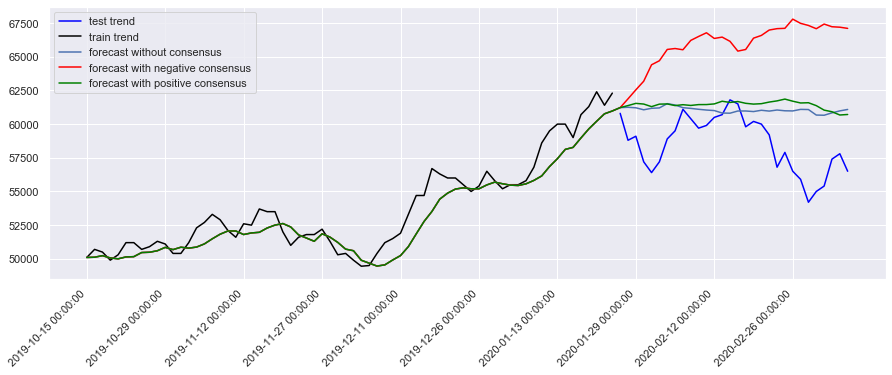

In [85]:
timestamp = df_final['date_1'].tolist()
pad_test = np.pad(df_test[:,0], (df_train.shape[0], 0), 'constant', constant_values=np.nan)

plt.figure(figsize = (15, 5))
plt.plot(pad_test, label = 'test trend', c = 'blue')
plt.plot(df_train[:,0], label = 'train trend', c = 'black')
plt.plot(deep_future, label = 'forecast without consensus')
plt.plot(deep_future_negative, label = 'forecast with negative consensus', c = 'red')
plt.plot(deep_future_positive, label = 'forecast with positive consensus', c = 'green')
plt.legend()
plt.xticks(
    np.arange(len(timestamp))[::10], timestamp[::10], rotation = '45', ha = 'right'
)
plt.show()